In [72]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
import warnings as w 
w.filterwarnings('ignore')

In [73]:
df=pd.read_csv("lessreal-data.csv",delimiter=';')

In [74]:
df.head(3)

,ID,Anime,Character,Quote,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.columns

Index(['ID', 'Anime', 'Character', 'Quote', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [76]:
df.drop(['Unnamed: 4', 'Unnamed: 5','Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10','Unnamed: 11'],axis=1,inplace=True)

In [77]:
df.head(3)

,ID,Anime,Character,Quote
0,0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...
1,1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and..."
2,2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ..."


In [78]:
df.head(3)

,ID,Anime,Character,Quote
0,0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...
1,1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and..."
2,2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ..."


In [79]:
df.shape

(8760, 4)

In [80]:
df.isna().sum()

ID           266
Anime        324
Character    394
Quote        404
dtype: int64

In [81]:
df.dropna(inplace=True)

In [82]:
df.isna().sum()

ID           0
Anime        0
Character    0
Quote        0
dtype: int64

In [83]:
df.shape

(8356, 4)

In [84]:
df['Anime'].unique()

array(['(Soul Eater)', '(ReLIFE)', '(Psycho-Pass Extended Edition)',
       '(Naruto)', '(Detective Conan)', '(Death Parade)',
       '(Darker than Black - Kuro no Keiyakusha: Gaiden)',
       '(Haikyuu!! Second Season)', '(Nekomonogatari: Kuro)', '(Hyouka)',
       '(Youjo Senki)', '(Bungou Stray Dogs 2nd Season)',
       '(Fullmetal Alchemist: Brotherhood)', '(Tokyo Ghoul √A)',
       '(Boku wa Tomodachi ga Sukunai NEXT)', '(Joker Game)',
       '(Avatar: The Last Airbender)', '(Charlotte)',
       '(Gekijōban Gintama Kanketsu-hen: Yorozuya yo Eien Nare)',
       '(Naruto Shippuuden)', '(Little Busters!)', '(Fairy Tail)',
       '(Aoharu x Kikanjuu)', '(Subete ga F ni Naru)',
       '(Danganronpa The Animation)', '(Ookami Shoujo To Kuro Ouji)',
       '(Hotarubi no Mori e)', '(Assassination Classroom)',
       '(Hunter X Hunter)', '(Date A Live)', '(Bleach)', '(Noragami)',
       '(The Melancholy of Haruhi Suzumiya)', '(Yu-Gi-Oh! Arc-V)',
       '(Owarimonogatari)', '(Monogatari Seri

In [85]:
df.duplicated().sum()

0

In [86]:
df['Character'].unique()

array(['Soul Eater', 'Ooga Kazuomi', 'Makishima Shougo', ..., 'Chii',
       'Eimi Ohba', ' alive'], dtype=object)

In [87]:
df['Character'].nunique()

2325

In [88]:
df['Character'].nunique()

2325

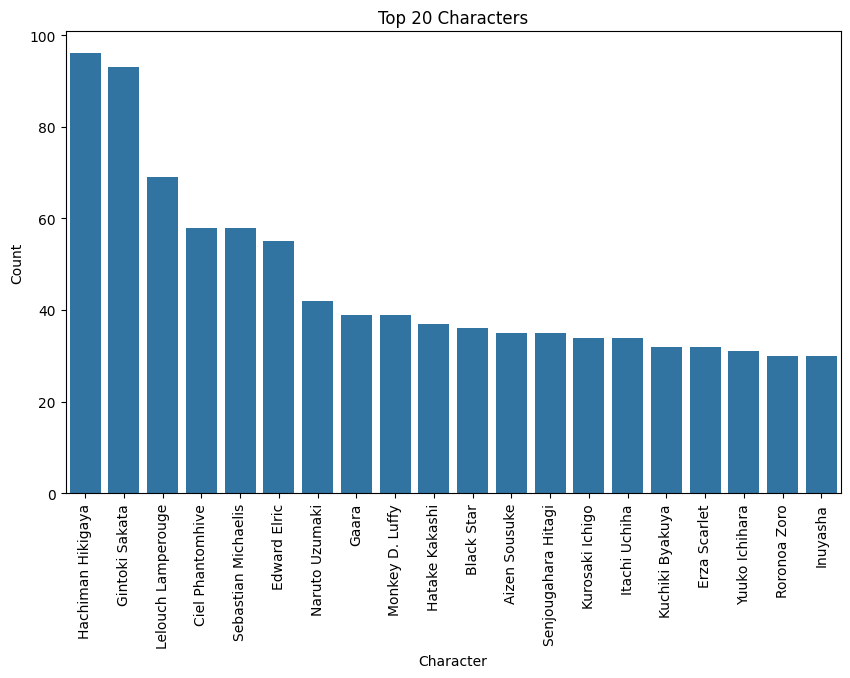

In [89]:
top_characters = df['Character'].value_counts().nlargest(20)
top_characters_df = top_characters.reset_index() 
top_characters_df.columns = ['Character', 'Count'] 

mp.figure(figsize=(10, 6))  
sn.barplot(x='Character', y='Count', data=top_characters_df)
mp.xticks(rotation=90)  
mp.title('Top 20 Characters')
mp.show()

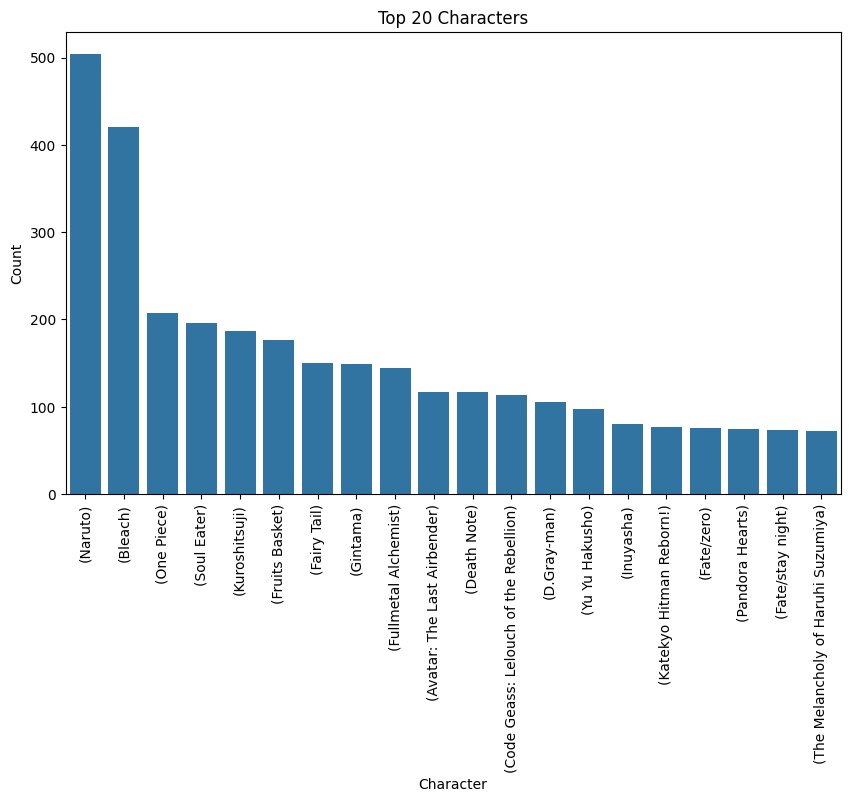

In [90]:
top_characters = df['Anime'].value_counts().nlargest(20)
top_characters_df = top_characters.reset_index() 
top_characters_df.columns = ['Character', 'Count'] 

mp.figure(figsize=(10, 6))  
sn.barplot(x='Character', y='Count', data=top_characters_df)
mp.xticks(rotation=90)  
mp.title('Top 20 Characters')
mp.show()

In [102]:
quote_df=df['Quote'].reset_index(False)

In [103]:
quote_df.head(5)

,index,Quote
0,0,In the end the shape and form don't matter at ...
1,1,"I'm still a man too, I wanted to look calm and..."
2,2,"Clausewitz, he pointed out that no matter how ..."
3,3,Because of the existence of love - sacrifice i...
4,4,Courage is a word of justice. It means the qua...


In [104]:
list_of_qoutes=quote_df['Quote'].tolist()

In [105]:
list_of_qoutes

["In the end the shape and form don't matter at all, it's only the soul that matters, right? Nothing else.",
 "I'm still a man too, I wanted to look calm and composed in front of everyone. Especially in front of the one I'm in love with.",
 'Clausewitz, he pointed out that no matter how carefully one plans, on the battlefield, even the smallest of details can cause setbacks. Regardless of how well-thought it is, armchair strategizing only works in the realm of theory. Unexpected troubles, or uncontrollable factors such as weather. Operations face those sorts of troubles. They are the cause of strife on the battlefield.',
 'Because of the existence of love - sacrifice is born. As well as hate. Then one comprehends... one knows PAIN.',
 'Courage is a word of justice. It means the quality of mind that enables one to face apprehension with confidence and resolution. It is not right to use it as an excuse to kill someone.',
 "Everyone Makes Mistakes. But people's feelings can manifest throu

In [107]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(list_of_qoutes)

sequences = tokenizer.texts_to_sequences(list_of_qoutes)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1


In [108]:
# Create sequences of a specific length
sequence_length = 5  # Example sequence length
sequences = []

for quote in list_of_qoutes:
    token_list = tokenizer.texts_to_sequences([quote])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

# Pad sequences
sequences = pad_sequences(sequences, maxlen=sequence_length, padding='pre')

# Split sequences into input (X) and output (y)
X = sequences[:,:-1]
y = sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)


In [109]:
X

array([[   0,    0,    0,   11],
       [   0,    0,   11,    1],
       [   0,   11,    1,  109],
       ...,
       [  48,   22,    5, 5610],
       [  22,    5, 5610,   48],
       [   5, 5610,   48,    5]])

In [110]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=sequence_length-1))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [112]:
model.fit(X, y, epochs=10, verbose=1)


MemoryError: Unable to allocate 8.13 GiB for an array with shape (199316, 10955) and data type float32

In [ ]:
def generate_quote(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=1)[0]
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

seed_text = "Life is"
next_words = 10
print(generate_quote(seed_text, next_words, model, sequence_length))
